In [ ]:
!pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/5

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Zy1QmIUMZvvWaghFtTAh")
project = rf.workspace("minhajul-samz-zone").project("clash-of-clans-vop4y-7jnpj")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Clash-of-Clans-1 in yolov11:: 100%|██████████| 662/662 [00:00<00:00, 6315.24it/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/Clash-of-Clans-1/data.yaml epochs=50 imgsz=640 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 199MB/s]
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Clash-of-Clans-1/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz

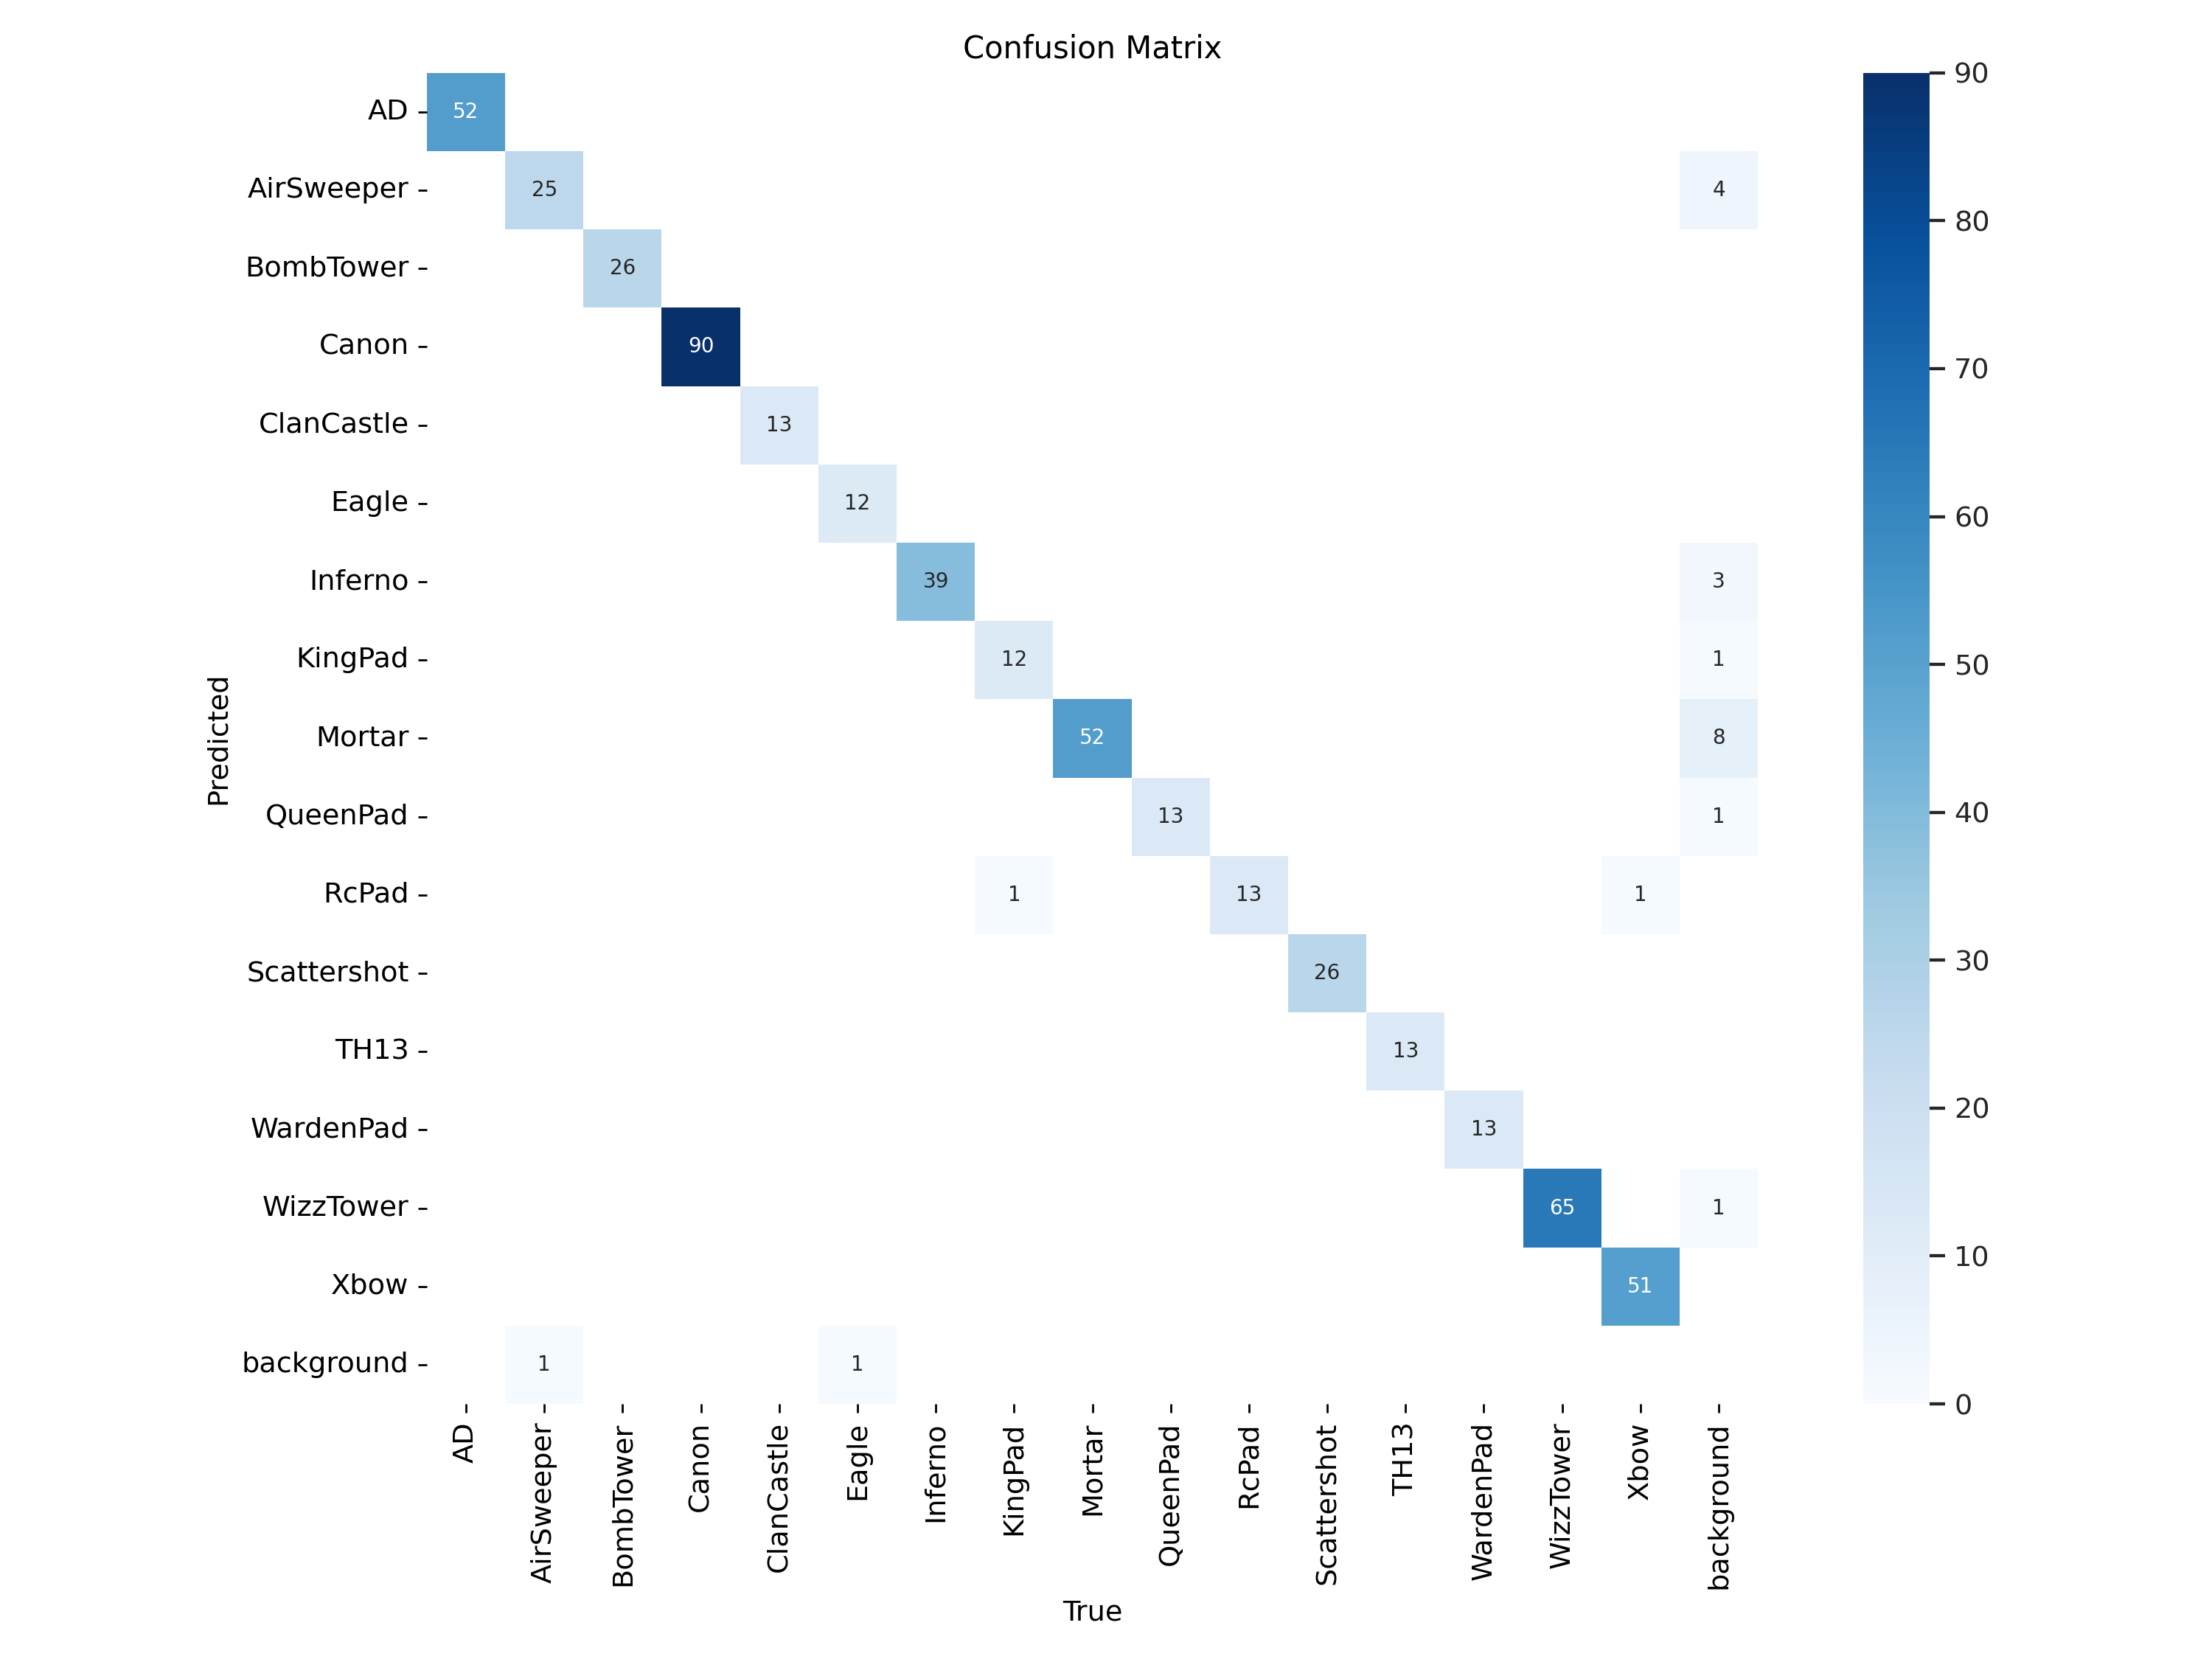

In [ ]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

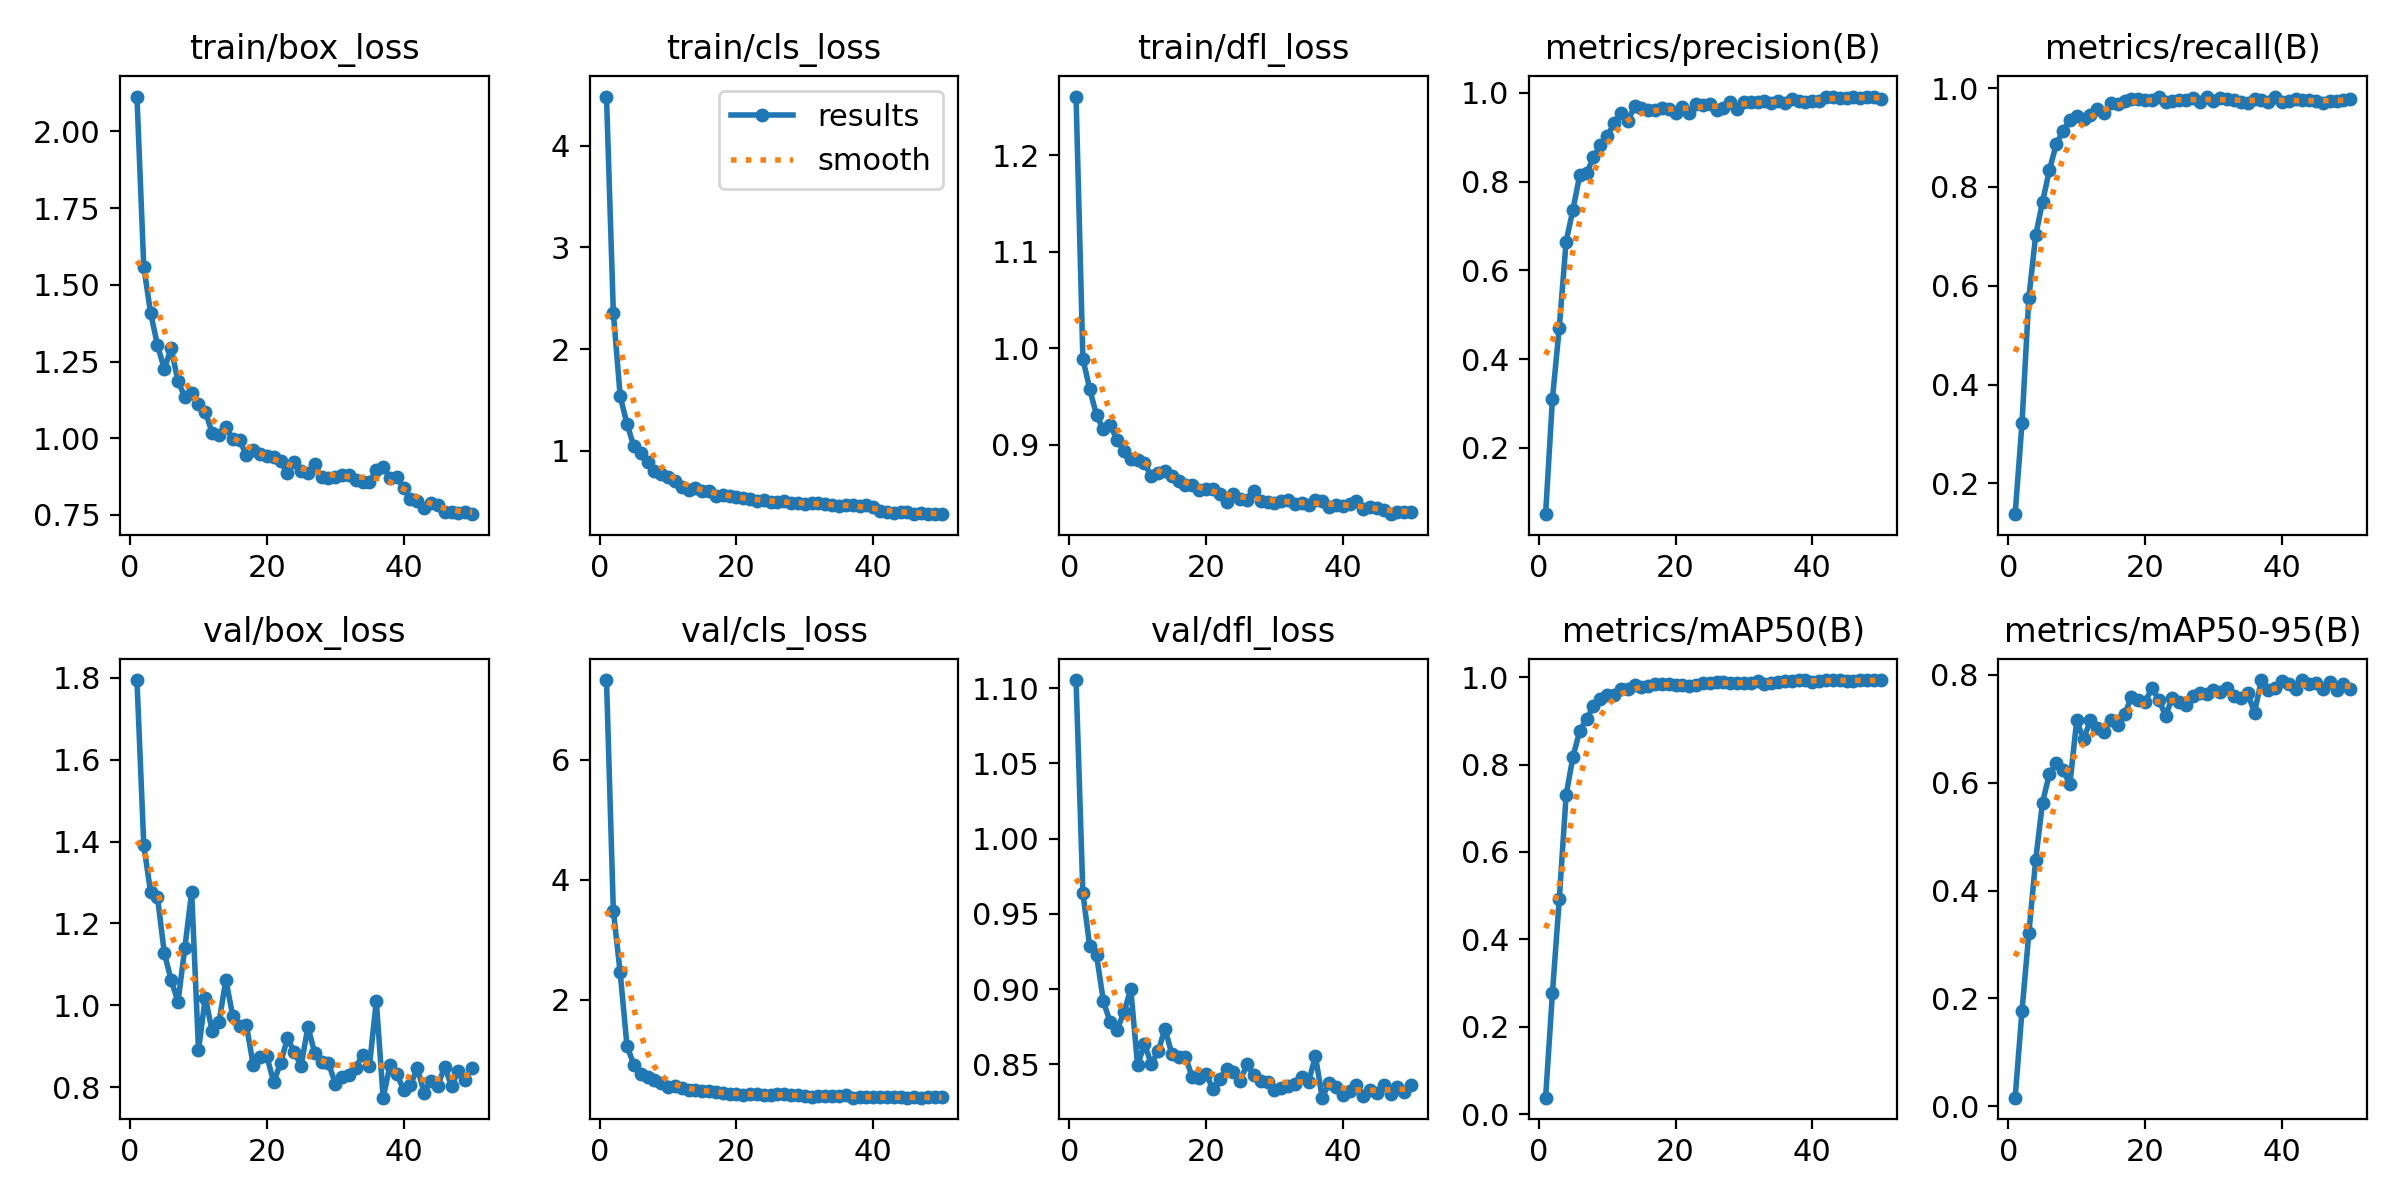

In [ ]:
IPyImage(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
import os

# Path to the weights directory
weights_dir = "/content/runs/detect/train/weights"

# Check if the directory exists
if os.path.exists(weights_dir):
    print("Weights directory found. Contents:")
    for file in os.listdir(weights_dir):
        print(file)
else:
    print("Weights directory not found.")


Weights directory found. Contents:
last.pt
best.pt


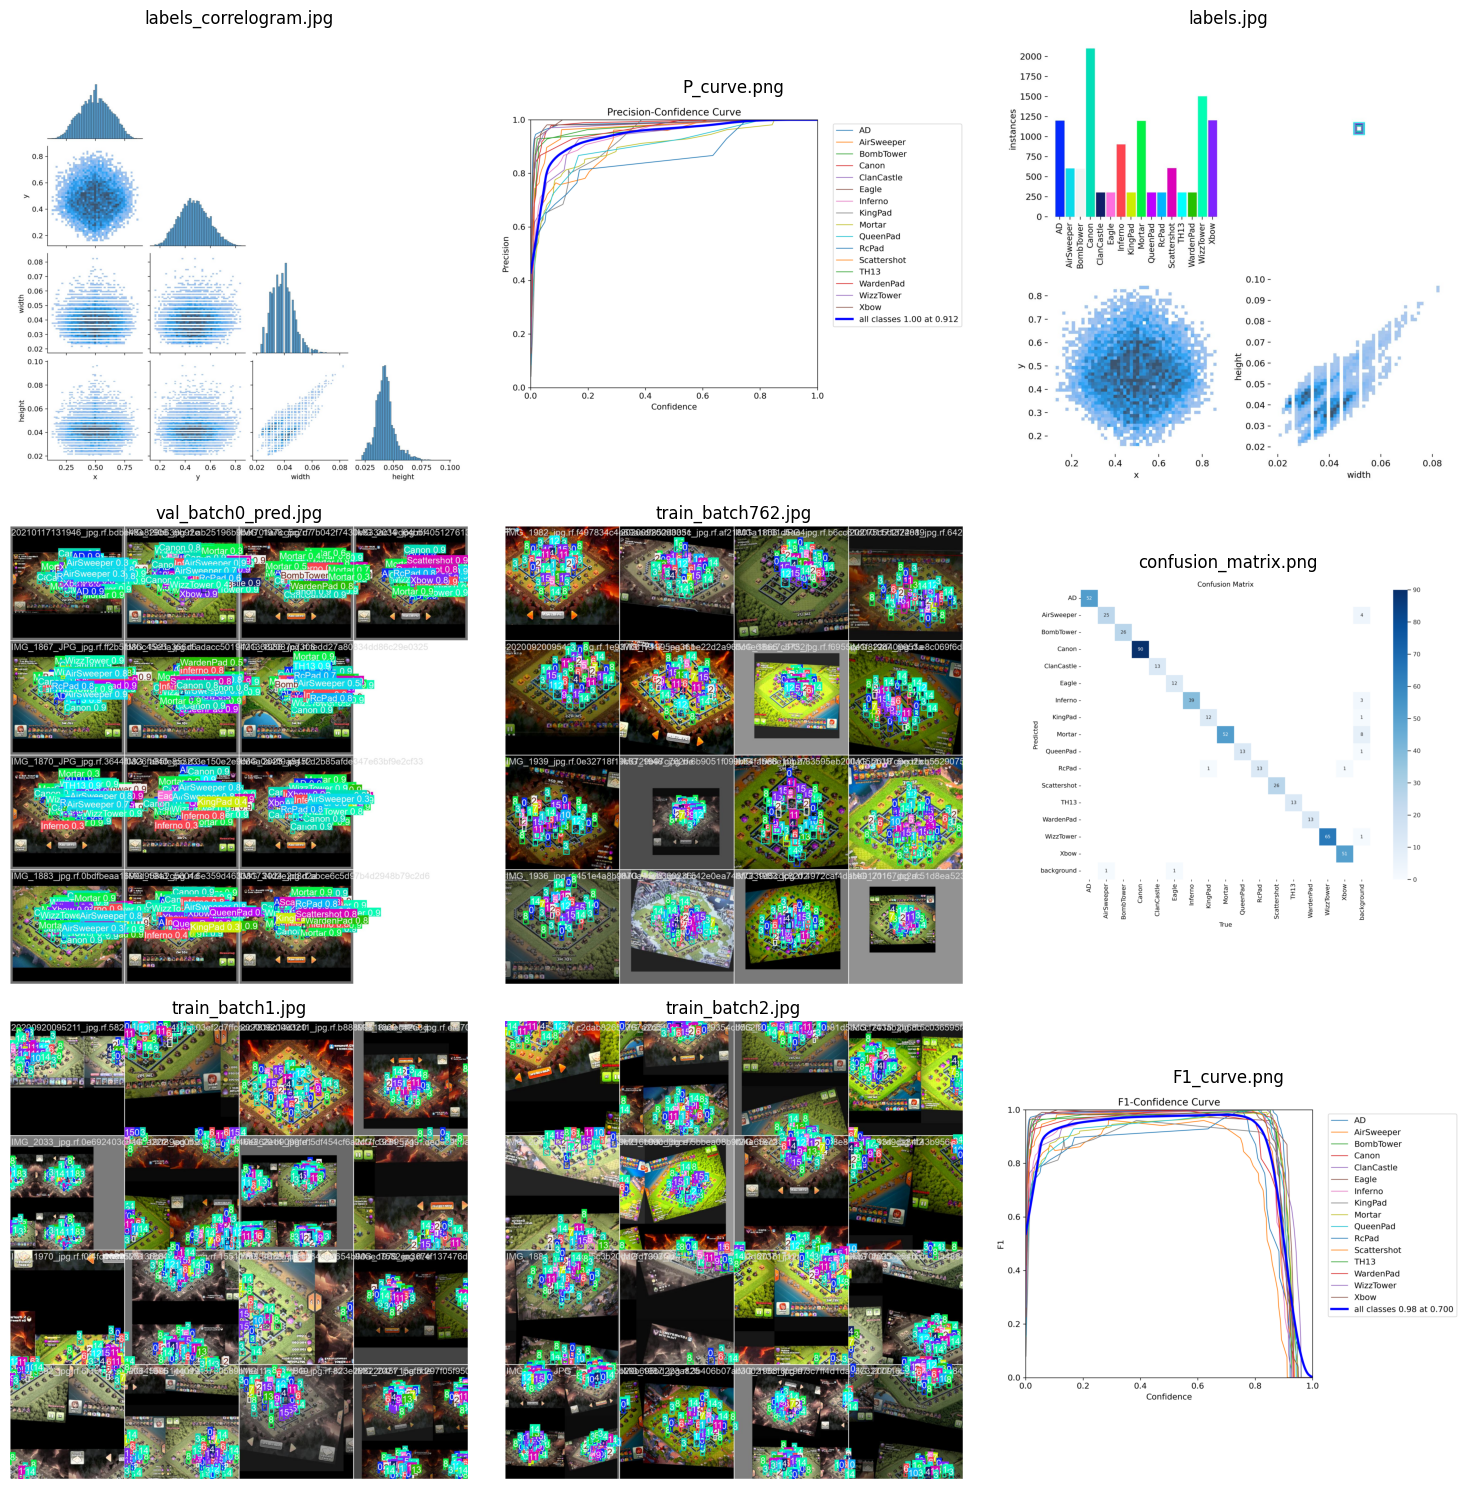

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
def display_images_from_folder(folder_path):
    """
    Finds and displays all .jpg, .png, and .jpeg images from a specified folder.
    """
    valid_extensions = ('.jpg', '.jpeg', '.png')
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]

    if not image_files:
        print("No valid images found in the specified folder.")
        return
    plt.figure(figsize=(15, 15))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Could not read image {image_file}. Skipping.")
            continue
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 3, i + 1)  # Adjust grid size as needed
        plt.imshow(image_rgb)
        plt.title(image_file)
        plt.axis('off')
        if i == 8:
            break

    plt.tight_layout()
    plt.show()
display_images_from_folder("/content/runs/detect/train")

Using input image: /content/Clash-of-Clans-1/valid/images/IMG_2024_jpg.rf.abce6c5d97b4d2948b79c2d63f58aebb.jpg

image 1/1 /content/Clash-of-Clans-1/valid/images/IMG_2024_jpg.rf.abce6c5d97b4d2948b79c2d63f58aebb.jpg: 640x640 4 ADs, 2 AirSweepers, 2 BombTowers, 7 Canons, 1 ClanCastle, 1 Eagle, 3 Infernos, 1 KingPad, 4 Mortars, 1 QueenPad, 1 RcPad, 2 Scattershots, 1 TH13, 1 WardenPad, 5 WizzTowers, 4 Xbows, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


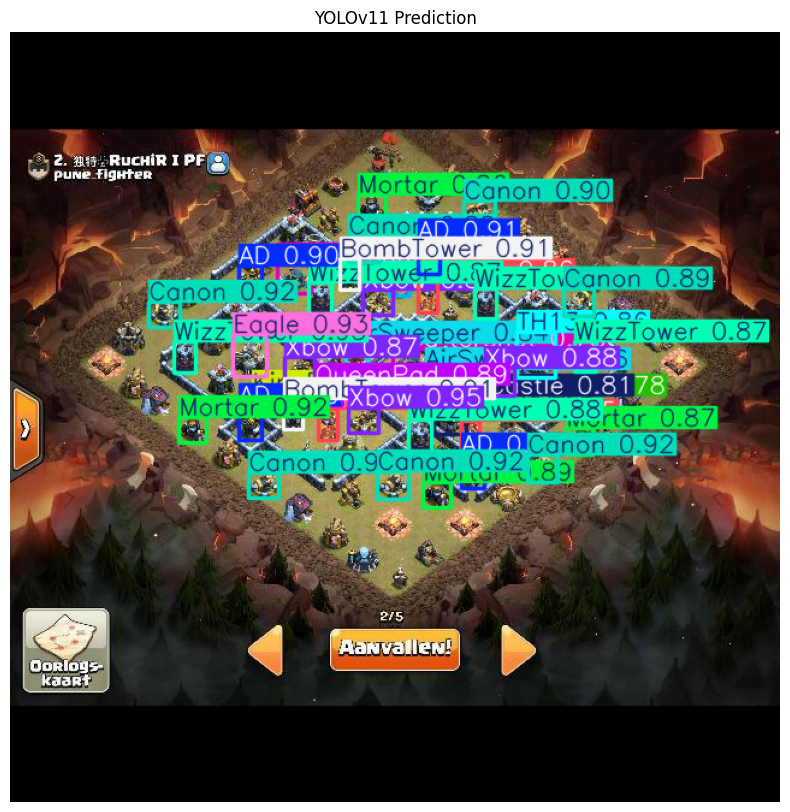

Result saved at: /content/runs/detect/result_image.jpg


In [38]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained model
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)
import glob
input_image_path = glob.glob("/content/Clash-of-Clans-1/valid/images/*.jpg")[0]
print(f"Using input image: {input_image_path}") # Print the image path to confirm

if not os.path.exists(input_image_path):
    raise FileNotFoundError(f"Input image not found: {input_image_path}")

results = model.predict(source=input_image_path, conf=0.7, iou=0.7)
result_image = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('YOLOv11 Prediction')
plt.show()
output_image_path = "/content/runs/detect/result_image.jpg"
cv2.imwrite(output_image_path, result_image)
print(f"Result saved at: {output_image_path}")